In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'../Data/DailyFailureWeather.csv')

In [3]:
df.head()

,Date,Failure.Rate,Temp,Cloud,Disc,Humidity,MaxTemp,MinTemp,Pressure,Rain,WindDir,WindSpeed,Unnamed: 12
0,1/1/2016,0.000000,24.1,4,Sunny,57,28,22,1018,0.0,ESE,13,NaN
1,1/2/2016,0.000000,25.0,4,Sunny,63,28,22,1017,0.0,SSE,13,NaN
2,1/3/2016,0.055556,21.0,32,Moderate or heavy rain shower,65,23,20,1017,7.9,WSW,22,NaN
3,1/4/2016,0.111111,19.6,27,Patchy rain possible,63,23,19,1018,0.0,WSW,14,NaN
4,1/5/2016,0.055556,19.6,19,Partly cloudy,55,23,20,1019,0.0,WSW,15,NaN


In [4]:
NWD=df.Pressure

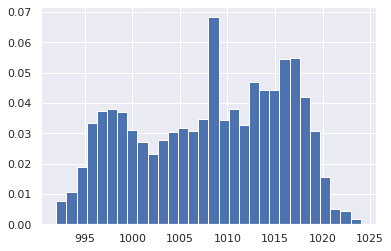

In [5]:
hist = plt.hist(NWD, bins=30, density=True)

In [6]:
Press =df.groupby(['Pressure'])['Failure.Rate'].agg('sum')

In [7]:
FWD = []
for T in Press.index :
    FWD.extend([T] *int(Press[T]))
FWD = np.asarray(FWD)

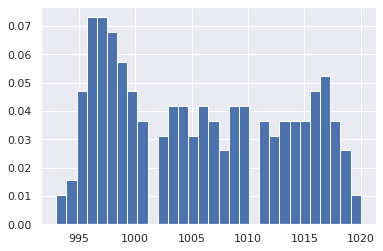

In [8]:
hist = plt.hist(FWD, bins=30, density=True)

In [9]:
x_d = np.linspace(980, 1025, 2000)


/tmp/ipykernel_15463/792020622.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


(0.0, 0.12)

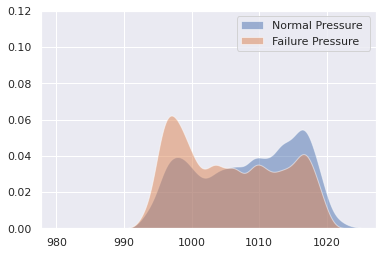

In [10]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Pressure ')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Pressure')
plt.legend(loc='upper right')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.12)

In [11]:
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))

12.507176231317079